# This Project to compare the weather data between Nordhausen (Germany) and El Mansura (Egypt) collected from POWER | Data Access Viewer (nasa.gov) and the effect on Clothes industry

## Mainly our foucs will be on the Winter period from 1st Nov 2020 to end Feb 2021
## We will try to compare Temperature, Wind speed and Relative Humidity

#### The value for missing source data that cannot be computed or is outside of the sources availability range: -999
#### Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 4.96 meters
#### Parameter(s): 
#### T2M         MERRA-2 Temperature at 2 Meters AVG Daily (C) 
#### WS10M       MERRA-2 Wind Speed at 10 Meters (m/s) 
#### RH2M        MERRA-2 Relative Humidity at 2 Meters (%) 
#### T2M_MAX     MERRA-2 Temperature at 2 Meters Maximum Daily (C) 
#### T2M_MIN     MERRA-2 Temperature at 2 Meters Minimum Daily (C) 

## Collecting Data Part

In [1]:
# Importing Libraries and reading files
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Reading El Mansura weather data and skipping the header info -13 rows- in csv file 
MansData = pd.read_csv(r"C:\Users\mabda\PythonProjects\DataAnalysis\Weather_Clothes\ElMansura_POWER_Point_Daily_20201101_20210228_031d0296N_031d4352E_LST.csv", skiprows=13)
MansDF = pd.DataFrame(MansData)

# Combine Year, Month and Day columns into datetime column and set as index
MansDF["Date"] = pd.to_datetime(MansDF.YEAR.astype(str) + '/' + MansDF.MO.astype(str) + '/' + MansDF.DY.astype(str))
MansDF = MansDF.set_index('Date')
print(MansDF)

print('─' * 100)

# Reading Nordhausen weather data and skipping the header info -13 rows- in csv file 
NordData = pd.read_csv(r"C:\Users\mabda\PythonProjects\DataAnalysis\Weather_Clothes\Nordhausen_POWER_Point_Daily_20201101_20210228_051d5072N_010d8308E_LST.csv", skiprows=13)
NordDF = pd.DataFrame(NordData)

# Combine Year, Month and Day columns into datetime column and set as index
NordDF["Date"] = pd.to_datetime(NordDF.YEAR.astype(str) + '/' + NordDF.MO.astype(str) + '/' + NordDF.DY.astype(str))
NordDF = NordDF.set_index('Date')
print(NordDF)

#
# We can drop some unnecessary columns using df.drop(). for example to drop the YEAR, MO and DY columns after combining it
# But Personally I prefer keeping the original data and not dropping it without strong cause for more analysis fairness.

            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2020-11-01  2020  11   1  23.11   3.75  59.12    29.19    19.47
2020-11-02  2020  11   2  22.44   3.59  59.62    29.10    17.95
2020-11-03  2020  11   3  21.93   3.82  56.94    28.48    17.28
2020-11-04  2020  11   4  22.27   4.96  58.88    28.18    18.39
2020-11-05  2020  11   5  21.76   5.23  56.44    26.76    18.39
...          ...  ..  ..    ...    ...    ...      ...      ...
2021-02-24  2021   2  24  14.81   4.73  71.38    21.80    10.22
2021-02-25  2021   2  25  15.47   3.27  75.31    24.39     9.64
2021-02-26  2021   2  26  15.11   1.90  71.56    22.27    10.39
2021-02-27  2021   2  27  15.25   4.25  71.75    22.55    10.33
2021-02-28  2021   2  28  14.73   3.91  73.81    22.18     9.01

[120 rows x 8 columns]
────────────────────────────────────────────────────────────────────────────────────────────────────
            YEAR  MO  DY    T2M  WS10M   RH

## Prepareing and Gathering some Insights from the Data

In [2]:
# df.info() function is used to get a concise summary of the dataframe.
#        It comes really handy when doing exploratory analysis of the data.

MansDF.info()
print('─' * 100)
NordDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2020-11-01 to 2021-02-28
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     120 non-null    int64  
 1   MO       120 non-null    int64  
 2   DY       120 non-null    int64  
 3   T2M      120 non-null    float64
 4   WS10M    120 non-null    float64
 5   RH2M     120 non-null    float64
 6   T2M_MAX  120 non-null    float64
 7   T2M_MIN  120 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 8.4 KB
────────────────────────────────────────────────────────────────────────────────────────────────────
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2020-11-01 to 2021-02-28
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     120 non-null    int64  
 1   MO       120 non-null    int64  
 2   DY       120 non-null    int64  
 3   T2M      120 non-null    flo

#### Shape can be used on numpy arrays, pandas series and dataframes.
#### It shows the number of dimensions as well as the size in each dimension.

In [3]:
print(MansDF.shape)
print(NordDF.shape)

#Size, as the name suggests, returns the size of a dataframe which is the number of rows multiplied by the number of columns.

print(MansDF.size)
print(NordDF.size)

(120, 8)
(120, 8)
960
960


#### The describe() method will do a quick statistical summary for every numerical column

In [4]:
print(MansDF.describe())
print('─' * 100)
print(NordDF.describe())

#
print('─' * 100); print('─' * 100);
#

# we can Describing a column from a DataFrame by accessing it as an attribute.
print(MansDF.T2M.describe())

              YEAR          MO          DY         T2M       WS10M  \
count   120.000000  120.000000  120.000000  120.000000  120.000000   
mean   2020.491667    6.575000   15.525000   16.514917    3.490000   
std       0.502027    5.062073    8.734133    2.753438    1.316182   
min    2020.000000    1.000000    1.000000    9.070000    1.460000   
25%    2020.000000    1.000000    8.000000   15.332500    2.495000   
50%    2020.000000   11.000000   15.500000   16.480000    3.320000   
75%    2021.000000   12.000000   23.000000   17.942500    4.165000   
max    2021.000000   12.000000   31.000000   23.110000    8.550000   

             RH2M     T2M_MAX     T2M_MIN  
count  120.000000  120.000000  120.000000  
mean    66.270833   23.335167   11.749667  
std      8.648994    3.316464    2.956563  
min     42.880000   11.730000    6.380000  
25%     60.862500   21.757500    9.710000  
50%     66.215000   23.520000   11.755000  
75%     72.827500   25.902500   13.567500  
max     83.380000

### Identifying Missing Values Isnull
#### Handling missing values is a critical step to build a robust data analysis process.
#### The missing values should be a top priority since they have a significant effect on the accuracy of any analysis.

In [5]:
print(MansDF.isnull())
print(NordDF.isnull())

print('─' * 100)

# Isna function returns a dataframe filled with boolean values with true indicating missing values.
print(MansDF.isna().any())
print(NordDF.isna().any())

print('─' * 100)

# df.isnull().sum() can calculate the number of missing values in each column 
print(MansDF.isnull().sum())
print(NordDF.isnull().sum())

##
## Luckly our datasets have no null values as we got it from good data center like NASA
## But most likely we receive a big dataset in real life, there will be some null values in most cases. It is really hard to get a perfect dataset.
## we have to deal with these null value by dropping it with dropna()  or filling it up with function .fillna() replaces the null values with some other value of our choice.

             YEAR     MO     DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                                  
2020-11-01  False  False  False  False  False  False    False    False
2020-11-02  False  False  False  False  False  False    False    False
2020-11-03  False  False  False  False  False  False    False    False
2020-11-04  False  False  False  False  False  False    False    False
2020-11-05  False  False  False  False  False  False    False    False
...           ...    ...    ...    ...    ...    ...      ...      ...
2021-02-24  False  False  False  False  False  False    False    False
2021-02-25  False  False  False  False  False  False    False    False
2021-02-26  False  False  False  False  False  False    False    False
2021-02-27  False  False  False  False  False  False    False    False
2021-02-28  False  False  False  False  False  False    False    False

[120 rows x 8 columns]
             YEAR     MO     DY    T2M  WS10M   RH2M 

In [6]:
#  nlargest(num, 'attribute') finds the #num observations with the Largest value inside attribute column.
#  Let's check the highest 5 Max and min daily temperature in mansura city during winter

print(MansDF.nlargest(5,'T2M_MAX'))
print('─' * 100)
print(MansDF.nlargest(5,'T2M_MIN'))

## we noitce it's not necessary that the days with highest max daily temperature to have highest min daily temperature

            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2020-11-01  2020  11   1  23.11   3.75  59.12    29.19    19.47
2021-02-09  2021   2   9  18.01   3.17  47.19    29.12    10.46
2020-11-02  2020  11   2  22.44   3.59  59.62    29.10    17.95
2020-11-13  2020  11  13  21.76   1.77  61.38    28.58    16.98
2020-11-03  2020  11   3  21.93   3.82  56.94    28.48    17.28
────────────────────────────────────────────────────────────────────────────────────────────────────
            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2020-11-01  2020  11   1  23.11   3.75  59.12    29.19    19.47
2020-11-04  2020  11   4  22.27   4.96  58.88    28.18    18.39
2020-11-05  2020  11   5  21.76   5.23  56.44    26.76    18.39
2020-11-02  2020  11   2  22.44   3.59  59.62    29.10    17.95
2020-11-06  2020  11   6  21.12   2.48  59.12    26.52    17.69


In [7]:
# nsmallest(num, 'attribute') finds the #num observations with the smallest value inside attribute column.
# let's try to compare the lowest min daily temperature between Nordhausen and Mansoura

print(MansDF.nsmallest(5,'T2M_MIN'))
print('─' * 100)
print(NordDF.nsmallest(5,'T2M_MIN'))

# we notice that the diffrence between the coldest point in Mansoura (6.38) and Nordhausen (-18.75) is (25.13) C degree
# we notice that February has the most coldest recordings in Nordhausen and Mixing with January in Mansoura city

            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2021-01-26  2021   1  26  13.29   3.20  71.06    21.39     6.38
2021-02-20  2021   2  20  11.93   3.73  65.88    18.94     6.59
2021-01-30  2021   1  30  13.08   5.62  56.88    20.37     6.80
2021-02-18  2021   2  18  11.28   4.79  65.19    16.73     6.85
2021-02-17  2021   2  17   9.07   8.55  66.31    11.73     7.11
────────────────────────────────────────────────────────────────────────────────────────────────────
            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2021-02-10  2021   2  10 -13.23   2.68  98.19    -7.33   -18.74
2021-02-14  2021   2  14 -11.28   2.87  96.12    -3.79   -18.14
2021-02-09  2021   2   9 -15.05   1.74  96.81   -11.75   -18.02
2021-02-13  2021   2  13 -12.17   1.74  97.62    -5.24   -16.01
2021-02-08  2021   2   8 -11.59   4.30  97.38    -9.87   -14.31


In [8]:
## df.count() It provides you the number of data in the DataFrame, we can add some conditions to find some insights
## we will try to find how many times the avg daily temperature goes below zero in Nordhausen 
NordDF[(NordDF.T2M<0)].count()['T2M'] 

## we find that in nordhausen 2021 winter it went below zero degree 55 time out of 120 days (4 months)
## No need to check for mansoura because it never went below zero degree in this winter

55

In [9]:
## df.loc() locates specific range of data takes as a parameter the column and rows indices and gives you the subset of the DataFrame accordingly.
## we will try to capture the avg daily temp and wind speed and relative humidity on Christmas holiday (25 Dec ~ 5 Jan) in both cities

print(MansDF.loc['2020-12-25':'2021-01-05', 'T2M':'RH2M'])
print('─' * 100)
print(NordDF.loc['2020-12-25':'2021-01-05', 'T2M':'RH2M'])

              T2M  WS10M   RH2M
Date                           
2020-12-25  16.63   2.43  61.69
2020-12-26  16.95   5.02  68.69
2020-12-27  18.54   4.31  66.31
2020-12-28  16.36   2.53  60.81
2020-12-29  15.80   2.55  74.75
2020-12-30  16.05   3.40  73.81
2020-12-31  16.22   2.65  75.06
2021-01-01  16.34   3.36  73.38
2021-01-02  17.39   3.35  74.94
2021-01-03  16.98   3.22  80.00
2021-01-04  17.41   2.73  79.25
2021-01-05  18.16   2.05  78.06
────────────────────────────────────────────────────────────────────────────────────────────────────
             T2M  WS10M   RH2M
Date                          
2020-12-25 -0.45   3.91  91.31
2020-12-26 -0.75   5.29  94.69
2020-12-27 -1.08   9.51  80.31
2020-12-28  0.03   3.89  92.56
2020-12-29 -0.61   4.38  97.06
2020-12-30 -0.06   4.11  97.25
2020-12-31 -0.79   3.62  96.62
2021-01-01 -0.99   1.88  95.69
2021-01-02 -1.25   1.95  94.06
2021-01-03 -2.10   4.25  96.50
2021-01-04 -2.53   2.80  97.88
2021-01-05 -2.41   3.41  97.69


In [10]:
## df[‘’].unique()  It is used to find out the unique values of a categorical column.
## we will try to find out the unique wind speed in both citys and sort them with sorted()

print(sorted(MansDF.WS10M.unique())) ## sorted values ascending 
print('─' * 100)
print(NordDF.WS10M.unique())         ## non sorted

[1.46, 1.52, 1.56, 1.58, 1.71, 1.77, 1.89, 1.9, 1.98, 1.99, 2.04, 2.05, 2.09, 2.12, 2.13, 2.16, 2.2, 2.23, 2.24, 2.25, 2.29, 2.3, 2.32, 2.41, 2.43, 2.48, 2.5, 2.53, 2.55, 2.59, 2.6, 2.65, 2.71, 2.72, 2.73, 2.88, 2.9, 2.98, 3.02, 3.06, 3.09, 3.1, 3.12, 3.16, 3.17, 3.2, 3.22, 3.23, 3.27, 3.29, 3.32, 3.34, 3.35, 3.36, 3.4, 3.41, 3.42, 3.44, 3.45, 3.52, 3.58, 3.59, 3.62, 3.7, 3.73, 3.74, 3.75, 3.82, 3.88, 3.91, 3.98, 4.02, 4.07, 4.12, 4.15, 4.21, 4.25, 4.31, 4.39, 4.44, 4.7, 4.73, 4.78, 4.79, 4.8, 4.85, 4.88, 4.96, 5.0, 5.02, 5.09, 5.18, 5.23, 5.41, 5.59, 5.62, 5.93, 5.94, 6.0, 6.12, 6.46, 6.62, 7.12, 8.55]
────────────────────────────────────────────────────────────────────────────────────────────────────
[5.29 6.98 3.68 2.92 2.39 1.83 2.97 2.27 1.88 1.98 2.12 4.12 3.77 3.98
 5.54 5.21 5.   4.08 6.05 3.73 5.55 5.22 3.69 3.49 4.02 3.65 1.59 2.85
 1.52 3.13 1.77 4.48 4.23 2.58 2.34 3.29 1.55 1.68 3.66 2.38 4.83 4.1
 2.69 4.93 4.17 5.3  4.28 5.05 6.75 3.07 5.23 3.91 9.51 3.89 4.38 4.11
 3.62

In [11]:
## combined conditions to get more specific insights
## we will try to get all info for days have temp above 5 and wind speed below 2 in both cities

print(MansDF[(MansDF['T2M']>5) & (MansDF['WS10M']<2)])
print('─' * 100)
print(NordDF[(NordDF['T2M']>5) & (NordDF['WS10M']<2)])

            YEAR  MO  DY    T2M  WS10M   RH2M  T2M_MAX  T2M_MIN
Date                                                           
2020-11-07  2020  11   7  20.70   1.99  66.31    26.18    16.46
2020-11-13  2020  11  13  21.76   1.77  61.38    28.58    16.98
2020-11-27  2020  11  27  17.93   1.46  64.12    22.60    14.31
2020-11-29  2020  11  29  17.12   1.52  66.75    23.02    12.45
2020-11-30  2020  11  30  17.43   1.58  57.88    23.76    12.05
2020-12-02  2020  12   2  16.79   1.71  65.31    23.04    10.81
2020-12-10  2020  12  10  15.85   1.89  63.19    23.39    10.02
2020-12-17  2020  12  17  16.68   1.98  72.12    22.98    12.96
2021-01-25  2021   1  25  14.18   1.89  64.94    21.76     9.40
2021-02-07  2021   2   7  15.90   1.56  72.44    24.12    10.62
2021-02-15  2021   2  15  15.36   1.99  61.75    23.76     9.73
2021-02-26  2021   2  26  15.11   1.90  71.56    22.27    10.39
────────────────────────────────────────────────────────────────────────────────────────────────────
   

In [12]:
### Evaluate the data in different time scales ###

##Getting the mean temperature for every month using the pivot table
## parameters: values= column to aggregate , index = choose array, aggfunc= choose the calculation you need -mean, sum ..etc-

mean_MansDF = MansDF.pivot_table(values='T2M', index=MansDF.index.month, aggfunc=np.mean)
print(mean_MansDF)
print('─' * 100)
mean_NordDF = NordDF.pivot_table(values='T2M', index=NordDF.index.month, aggfunc=np.mean)
print(mean_NordDF)

            T2M
Date           
1     14.996129
2     14.743214
11    19.746333
12    16.506774
────────────────────────────────────────────────────────────────────────────────────────────────────
           T2M
Date          
1    -1.949355
2    -1.347857
11    4.906333
12    0.999677


## Plotting, Resampling and Aggregating Part

### we will try Resampling our data from days into weeks and months
### we already have the basic data into days scale
### we will focus on the temperature metrics avg daily temp (T2M), max daily temp (T2M_Max), min daily temp (T2M_MIN) and try to resample it into weekly and monthly


In [13]:
# Resampling into weekly time scale

MansDF_week = MansDF.resample('W').agg({  ## Resampling into week
    'T2M':'mean',                         ## taking the mean value for the avg daily temp column over every week
    'T2M_MAX':'max',                      ## taking the max value for the max daily temp column over every week
    'T2M_MIN':'min'})                     ## taking the min value for the min daily temp column over every week

print(MansDF_week)

print('─' * 100)

NordDF_week = NordDF.resample('W').agg({  ## Resampling into week
    'T2M':'mean',                         ## taking the mean value for the avg daily temp column over every week
    'T2M_MAX':'max',                      ## taking the max value for the max daily temp column over every week
    'T2M_MIN':'min'})                     ## taking the min value for the min daily temp column over every week

print(NordDF_week)

                  T2M  T2M_MAX  T2M_MIN
Date                                   
2020-11-01  23.110000    29.19    19.47
2020-11-08  21.661429    29.10    16.19
2020-11-15  20.642857    28.58    14.08
2020-11-22  18.641429    26.67    12.32
2020-11-29  17.890000    24.86    11.97
2020-12-06  16.551429    24.47     8.97
2020-12-13  16.764286    26.73     9.65
2020-12-20  16.307143    23.03    11.77
2020-12-27  16.764286    26.41    11.69
2021-01-03  16.448571    24.76    10.13
2021-01-10  17.684286    27.68    11.99
2021-01-17  15.347143    27.69     7.33
2021-01-24  12.430000    21.18     7.15
2021-01-31  13.705714    24.48     6.38
2021-02-07  16.692857    28.26     9.90
2021-02-14  15.972857    29.12     8.47
2021-02-21  11.707143    23.76     6.59
2021-02-28  14.600000    24.39     8.24
────────────────────────────────────────────────────────────────────────────────────────────────────
                  T2M  T2M_MAX  T2M_MIN
Date                                   
2020-11-01  11.3000

In [14]:
# Resampling into Monthly time scale

MansDF_month = MansDF.resample('M').agg({  ## Resampling into month
    'T2M':'mean',                         ## taking the mean value for the avg daily temp column over every month
    'T2M_MAX':'max',                      ## taking the max value for the max daily temp column over every month
    'T2M_MIN':'min'})                     ## taking the min value for the min daily temp column over every month

print(MansDF_month)

print('─' * 100)

NordDF_month = NordDF.resample('M').agg({  ## Resampling into month
    'T2M':'mean',                         ## taking the mean value for the avg daily temp column over every month
    'T2M_MAX':'max',                      ## taking the max value for the max daily temp column over every month
    'T2M_MIN':'min'})                     ## taking the min value for the min daily temp column over every month

print(NordDF_month)

                  T2M  T2M_MAX  T2M_MIN
Date                                   
2020-11-30  19.746333    29.19    11.97
2020-12-31  16.506774    26.73     8.97
2021-01-31  14.996129    27.69     6.38
2021-02-28  14.743214    29.12     6.59
────────────────────────────────────────────────────────────────────────────────────────────────────
                 T2M  T2M_MAX  T2M_MIN
Date                                  
2020-11-30  4.906333    18.38    -2.50
2020-12-31  0.999677    12.07    -3.93
2021-01-31 -1.949355     5.30    -9.47
2021-02-28 -1.347857    15.38   -18.74


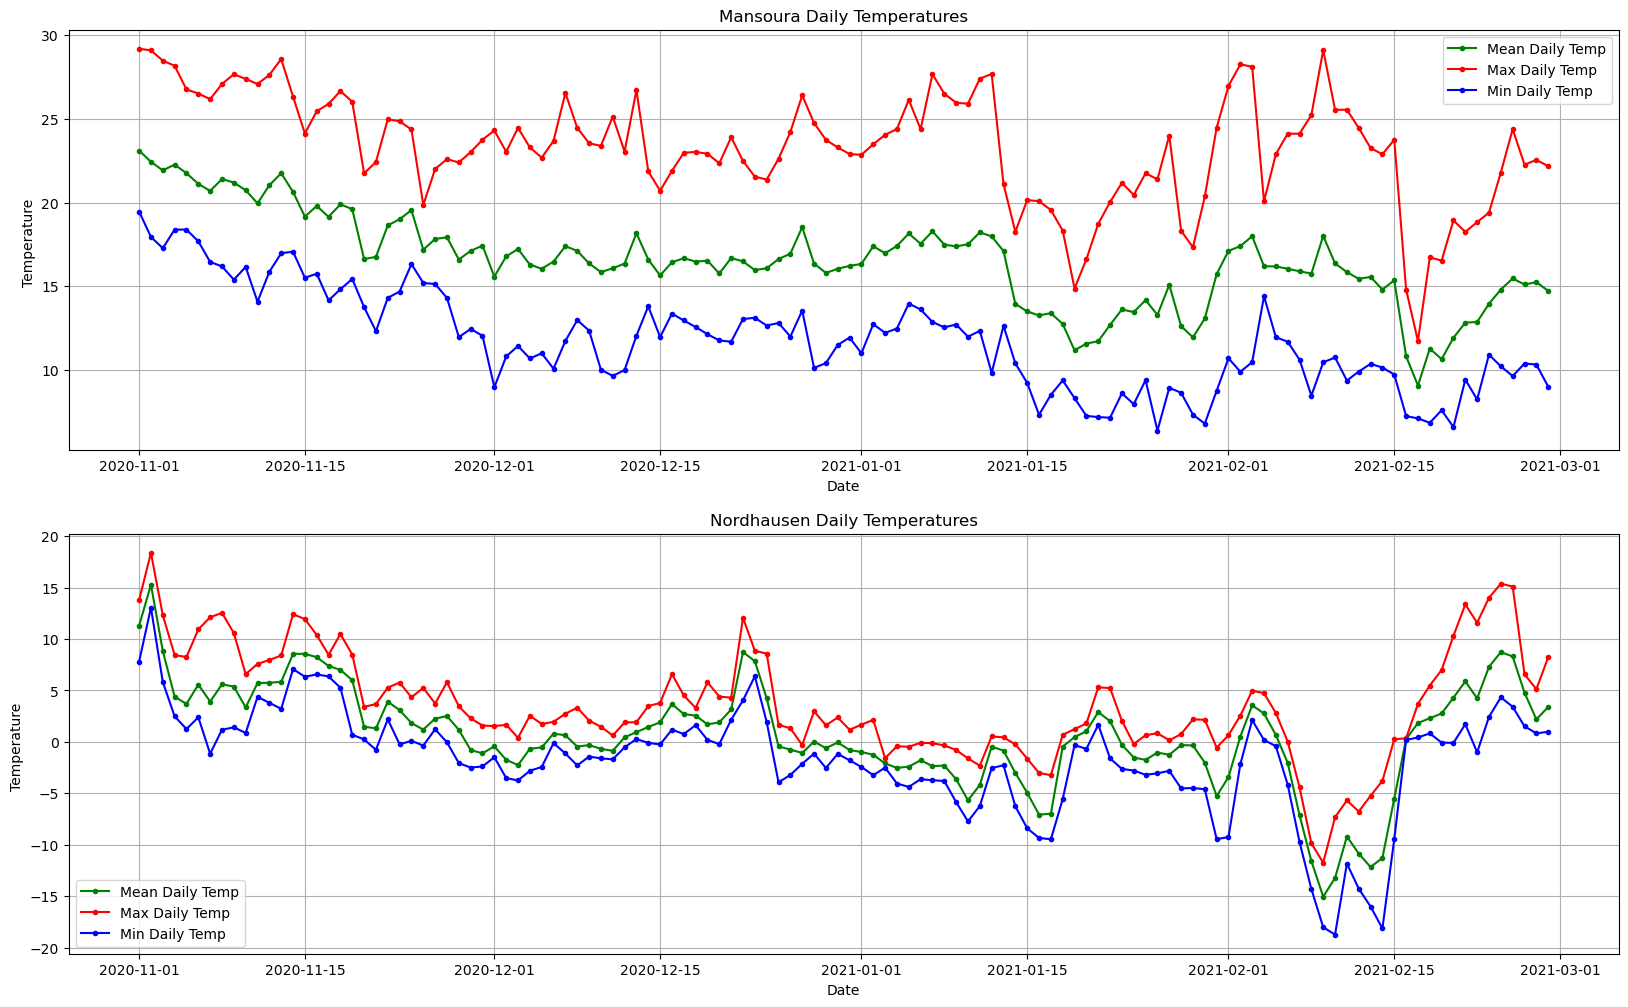

In [15]:
## Ploting Daily Temps
## Creating a figure with 2 vertical sub plots instead of all info in single plto for better readability
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 12))

#Mansura Plot Part
ax1.plot(MansDF['T2M'], color='g', marker='.', label='Mean Daily Temp')
ax1.plot(MansDF['T2M_MAX'], color='r', marker='.', label='Max Daily Temp')
ax1.plot(MansDF['T2M_MIN'], color='b', marker='.', label='Min Daily Temp')
ax1.set_title('Mansoura Daily Temperatures')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature ')
ax1.legend()
ax1.grid()

#Nordhausen Plot Part
ax2.plot(NordDF['T2M'], color='g', marker='.', label='Mean Daily Temp')
ax2.plot(NordDF['T2M_MAX'], color='r', marker='.', label='Max Daily Temp')
ax2.plot(NordDF['T2M_MIN'], color='b', marker='.', label='Min Daily Temp')
ax2.set_title('Nordhausen Daily Temperatures')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature ')
ax2.legend()
ax2.grid()

## From plots we notice that Mansura higher range -diffrence betweem TMAX and TMIN- in its daily temperatures around 12 degree difference for the same day
## while in Nordhausen the temps have little change though the day around 5 degrees and some days it almost no change at all like 16-2-2021

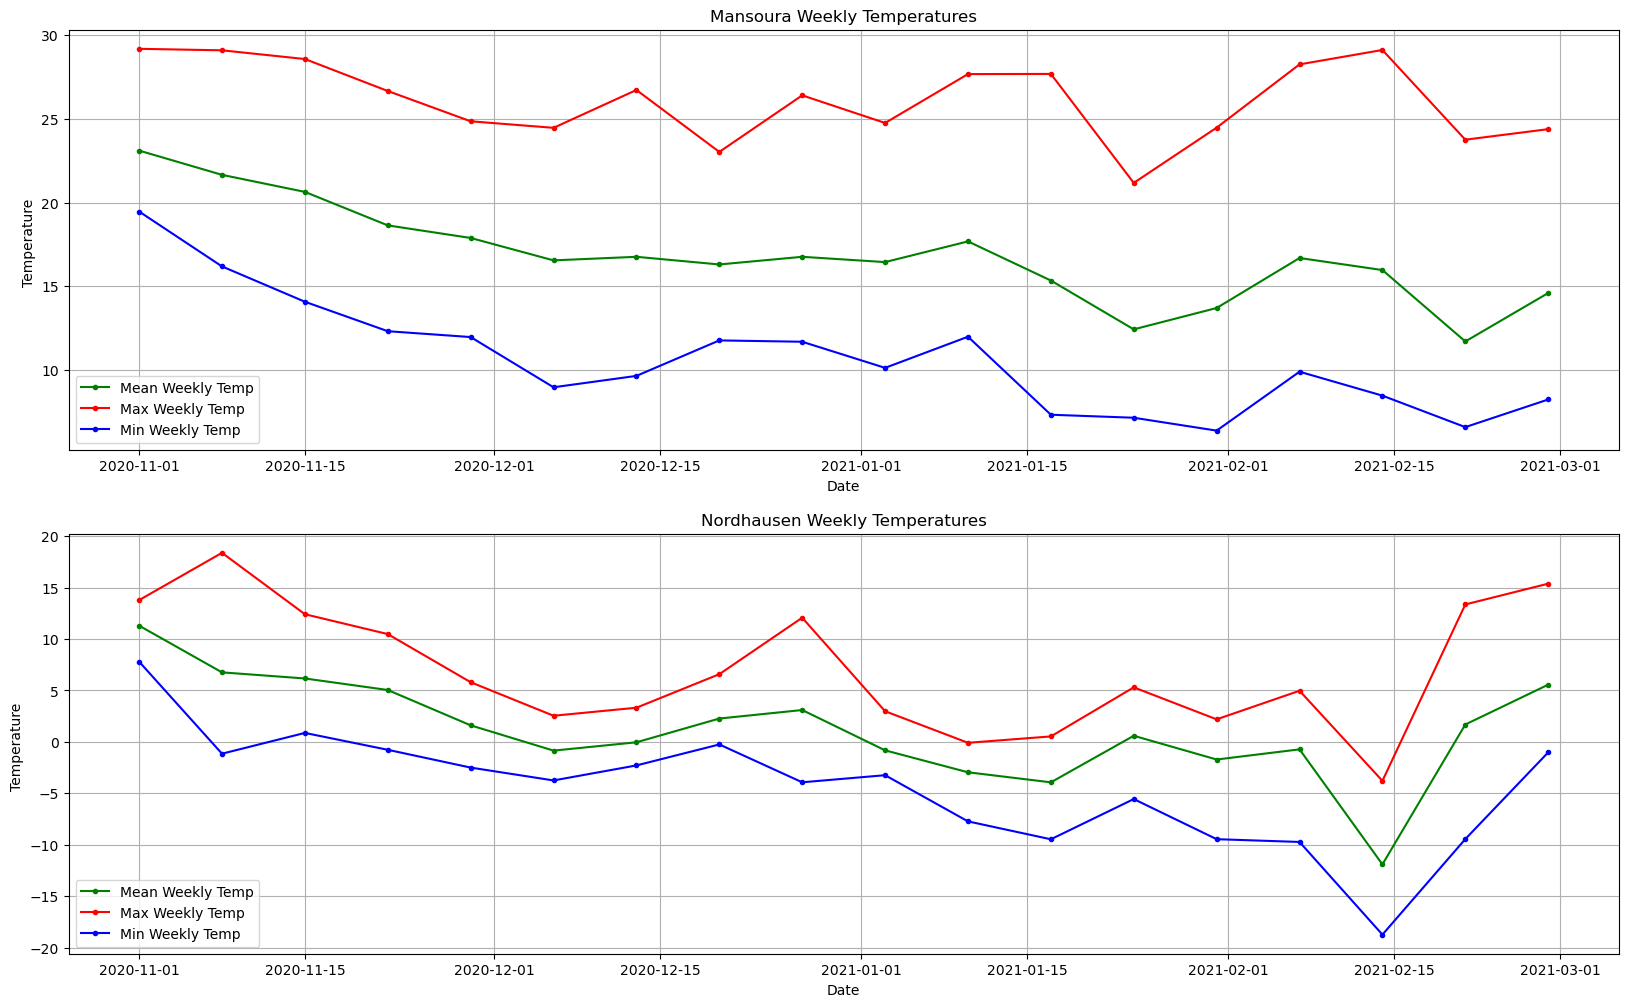

In [16]:
## Ploting Weekly resampled Temps
## Creating a figure with 2 vertical sub plots instead of all info in single plto for better readability
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 12))

#Mansura Plot Part
ax1.plot(MansDF_week['T2M'], color='g', marker='.', label='Mean Weekly Temp')
ax1.plot(MansDF_week['T2M_MAX'], color='r', marker='.', label='Max Weekly Temp')
ax1.plot(MansDF_week['T2M_MIN'], color='b', marker='.', label='Min Weekly Temp')
ax1.set_title('Mansoura Weekly Temperatures')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature ')
ax1.legend()
ax1.grid()

#Nordhausen Plot Part
ax2.plot(NordDF_week['T2M'], color='g', marker='.', label='Mean Weekly Temp')
ax2.plot(NordDF_week['T2M_MAX'], color='r', marker='.', label='Max Weekly Temp')
ax2.plot(NordDF_week['T2M_MIN'], color='b', marker='.', label='Min Weekly Temp')
ax2.set_title('Nordhausen Weekly Temperatures')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature ')
ax2.legend()
ax2.grid()

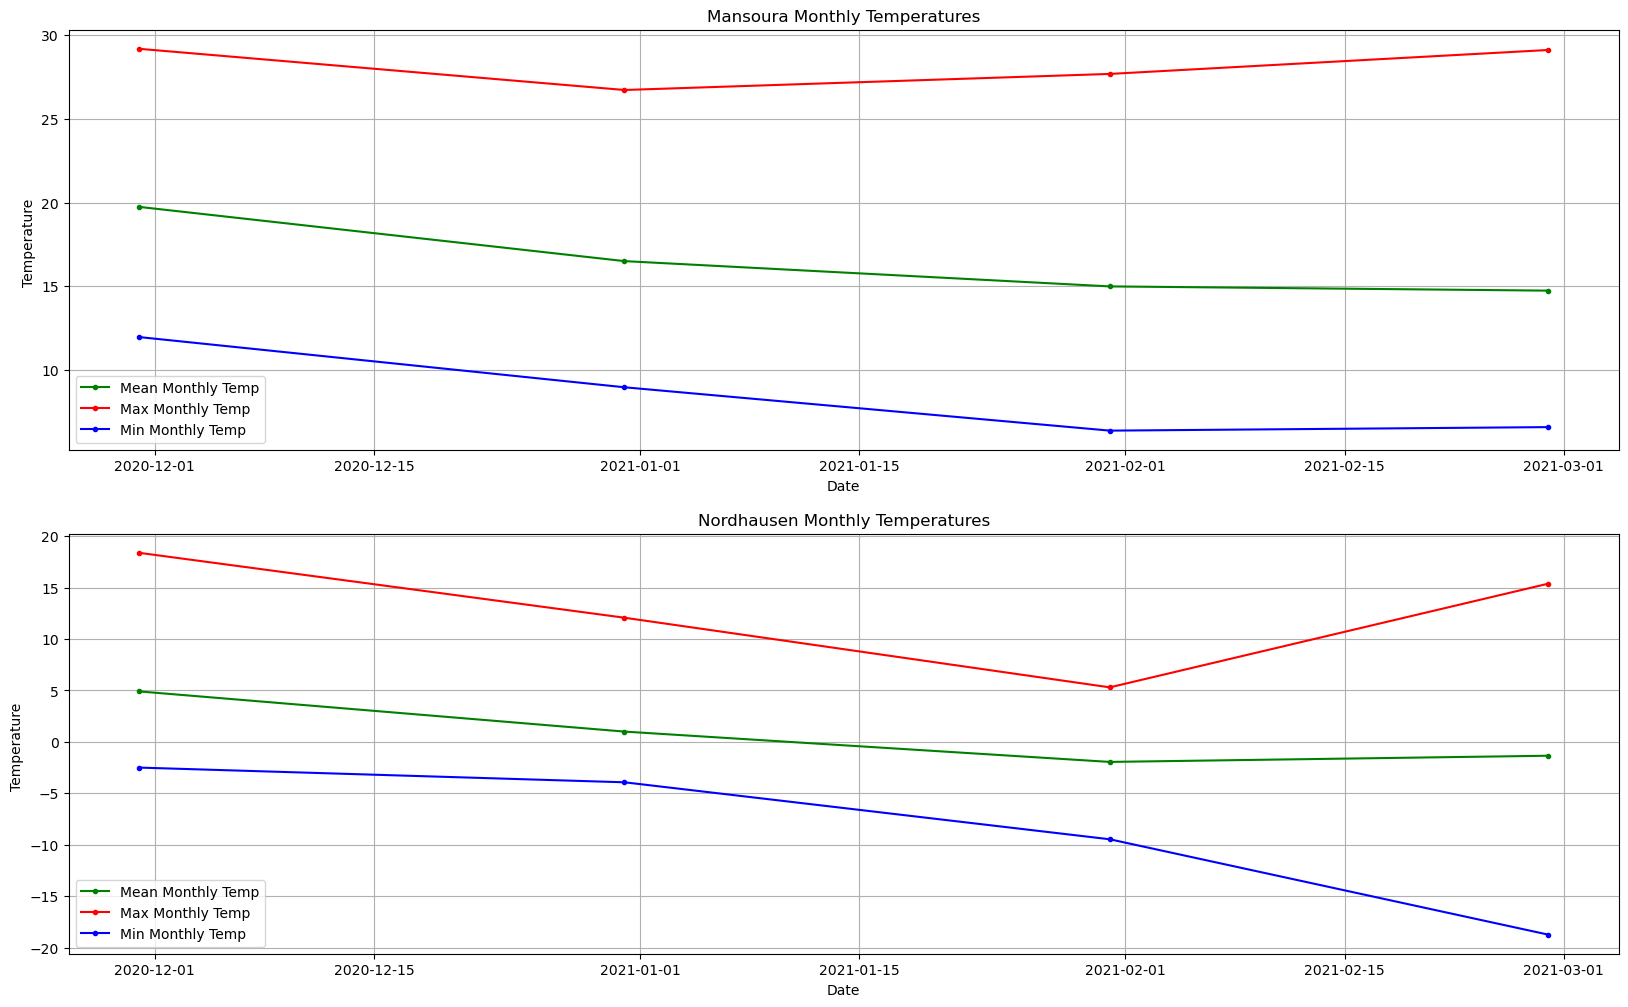

In [17]:
## Ploting Monthly resampled Temps
## Creating a figure with 2 vertical sub plots instead of all info in single plto for better readability
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 12))

#Mansura Plot Part
ax1.plot(MansDF_month['T2M'], color='g', marker='.', label='Mean Monthly Temp')
ax1.plot(MansDF_month['T2M_MAX'], color='r', marker='.', label='Max Monthly Temp')
ax1.plot(MansDF_month['T2M_MIN'], color='b', marker='.', label='Min Monthly Temp')
ax1.set_title('Mansoura Monthly Temperatures')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature ')
ax1.legend()
ax1.grid()

#Nordhausen Plot Part
ax2.plot(NordDF_month['T2M'], color='g', marker='.', label='Mean Monthly Temp')
ax2.plot(NordDF_month['T2M_MAX'], color='r', marker='.', label='Max Monthly Temp')
ax2.plot(NordDF_month['T2M_MIN'], color='b', marker='.', label='Min Monthly Temp')
ax2.set_title('Nordhausen Monthly Temperatures')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature ')
ax2.legend()
ax2.grid()

{'Mean': 16.514916666666668, 'MAX': 29.19, 'MIN': 6.38}
{'Mean': 0.6667500000000002, 'MAX': 18.38, 'MIN': -18.74}


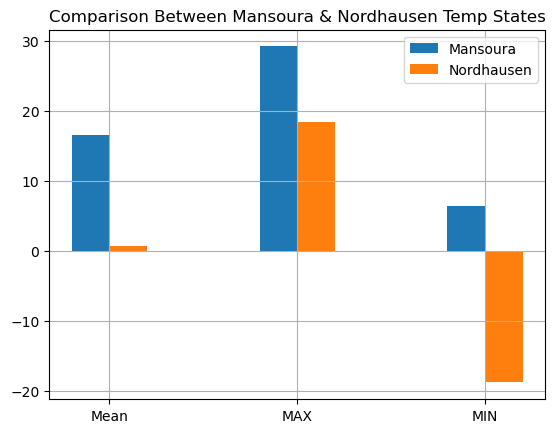

In [18]:
## Plotting and comparing main temp stats between the 2 cities using Bar chart
## our comparison points: the mean of mean daily temps T2M, the Max of Max daily temps T2M_MAX, the Min of Min daily temps T2M_MIN
## Collecting these stats into dictionary 
MansTempStat = {"Mean": MansDF['T2M'].mean(), "MAX": MansDF['T2M_MAX'].max(), "MIN": MansDF['T2M_MIN'].min()}
NordTempStat = {"Mean": NordDF['T2M'].mean(), "MAX": NordDF['T2M_MAX'].max(), "MIN": NordDF['T2M_MIN'].min()}
print(MansTempStat)
print(NordTempStat)

# Preparing the Bar chart parameters for the plot
index = np.arange(3)
bar_width = 0.2

MansTemps = list(MansTempStat.values())
NordTemps = list(NordTempStat.values())
tick_label = list(MansTempStat.keys())

# plotting the bar chart
plt.bar(index, MansTemps, width=bar_width, label='Mansoura')
plt.bar(index+bar_width, NordTemps, width=bar_width, label='Nordhausen')
plt.xticks(index+bar_width/2, tick_label)
plt.title('Comparison Between Mansoura & Nordhausen Temp States')
plt.legend()
plt.grid()

## Hypothesis:
#### As shown in the daily plot we can see that Mansoura city has a wide range (15° difference) of Temperature degrees in single day, while Nordhausen almost no change of temperature (3° difference)
### Effect on clothes industry:
#### Mansoura: preferably multi-layer medium clothes as on the morning with high temps they can take off some clothes layers and wearing it back gradually through the day while temps go down at night. While in Nordhausen to use single or two layers clothes design as temp stable through the day and a heavy single layer clothes cheaper and easier for production than multi-layer medium clothes together.